Original Image - Width: 1886, Height: 2829
1/1 [==============================] - 0s 81ms/step


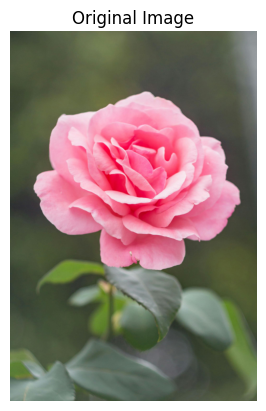

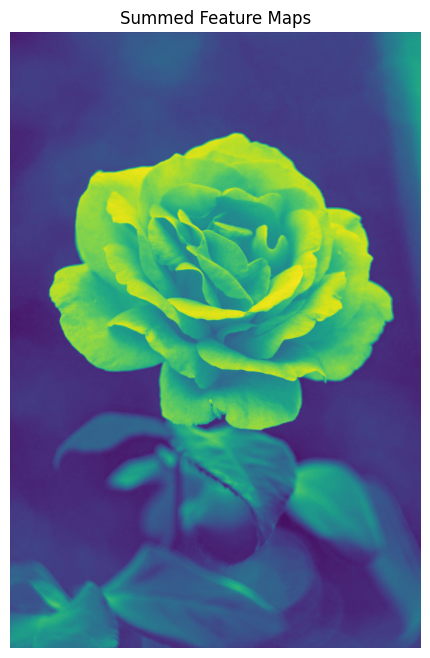

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
import cv2

# Load the image
img_path = '/home/icmr/Pictures/FLOWER.jpg'
img = cv2.imread(img_path)

# Convert the image to RGB (OpenCV loads images in BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get the original image dimensions
height, width, channels = img.shape
print(f"Original Image - Width: {width}, Height: {height}")

# Normalize the image (scale pixel values to range [0, 1])
img_normalized = img_rgb / 255.0

# Add an extra dimension to represent the batch size (needed for Keras)
img_batch = np.expand_dims(img_normalized, axis=0)

# Create a simple model with 32 filters using Conv2D
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(height, width, 3))
])

# Get the filtered output from the model (the convolution layer)
filtered_img = model.predict(img_batch)

# Remove the batch dimension to get the final image shape
filtered_img = filtered_img[0]

# Sum all feature maps to create a single image
summed_feature_maps = np.sum(filtered_img, axis=-1)  # Sum across the last axis (32 filters)

plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the summed feature map as a single image
plt.figure(figsize=(8, 8))
plt.imshow(summed_feature_maps, cmap='viridis')
plt.title('Summed Feature Maps')
plt.axis('off')
plt.show()

# Get the original image dimensions
height, width, channels = summed_feature_maps.shape
print(f"Original Image - Width: {width}, Height: {height}")
